In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set_theme()

In [3]:
data = pd.read_csv('churn-bigml-80.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
df = data['Churn'].loc[data['Churn']==True]
df

18      True
28      True
35      True
45      True
48      True
        ... 
2631    True
2641    True
2656    True
2657    True
2658    True
Name: Churn, Length: 388, dtype: bool

In [8]:
df.index

Index([  18,   28,   35,   45,   48,   58,   64,   65,   71,   72,
       ...
       2598, 2605, 2614, 2624, 2628, 2631, 2641, 2656, 2657, 2658],
      dtype='int64', length=388)

In [9]:
data_int = data.select_dtypes(include=["float64","int64"])

data_int.drop(columns = ['Area code'], inplace = True)
data_int

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


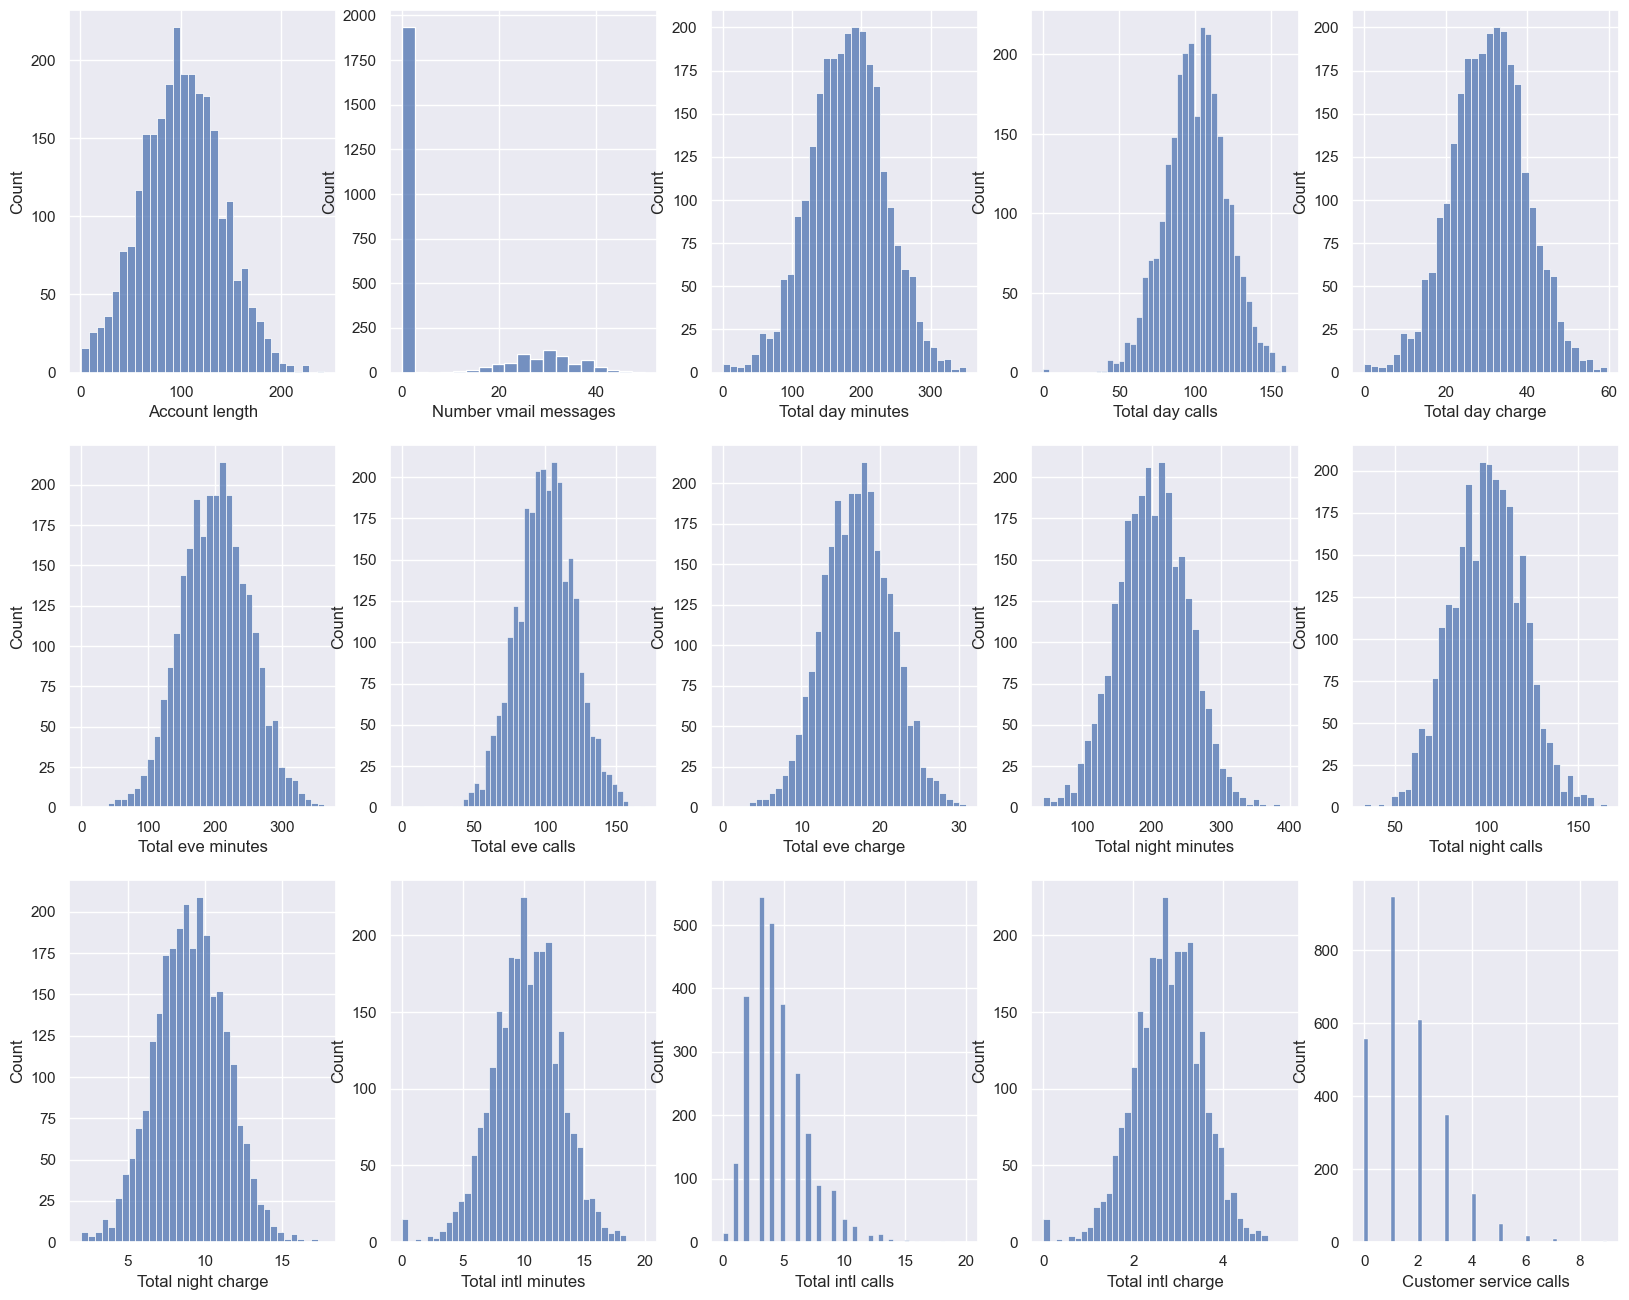

In [10]:
f, axes = plt.subplots(3,5, figsize=(20,16))
axes = axes.ravel()
count= 0
for var in data_int:
    sb.histplot(data=data[var], ax = axes[count])
    count +=1

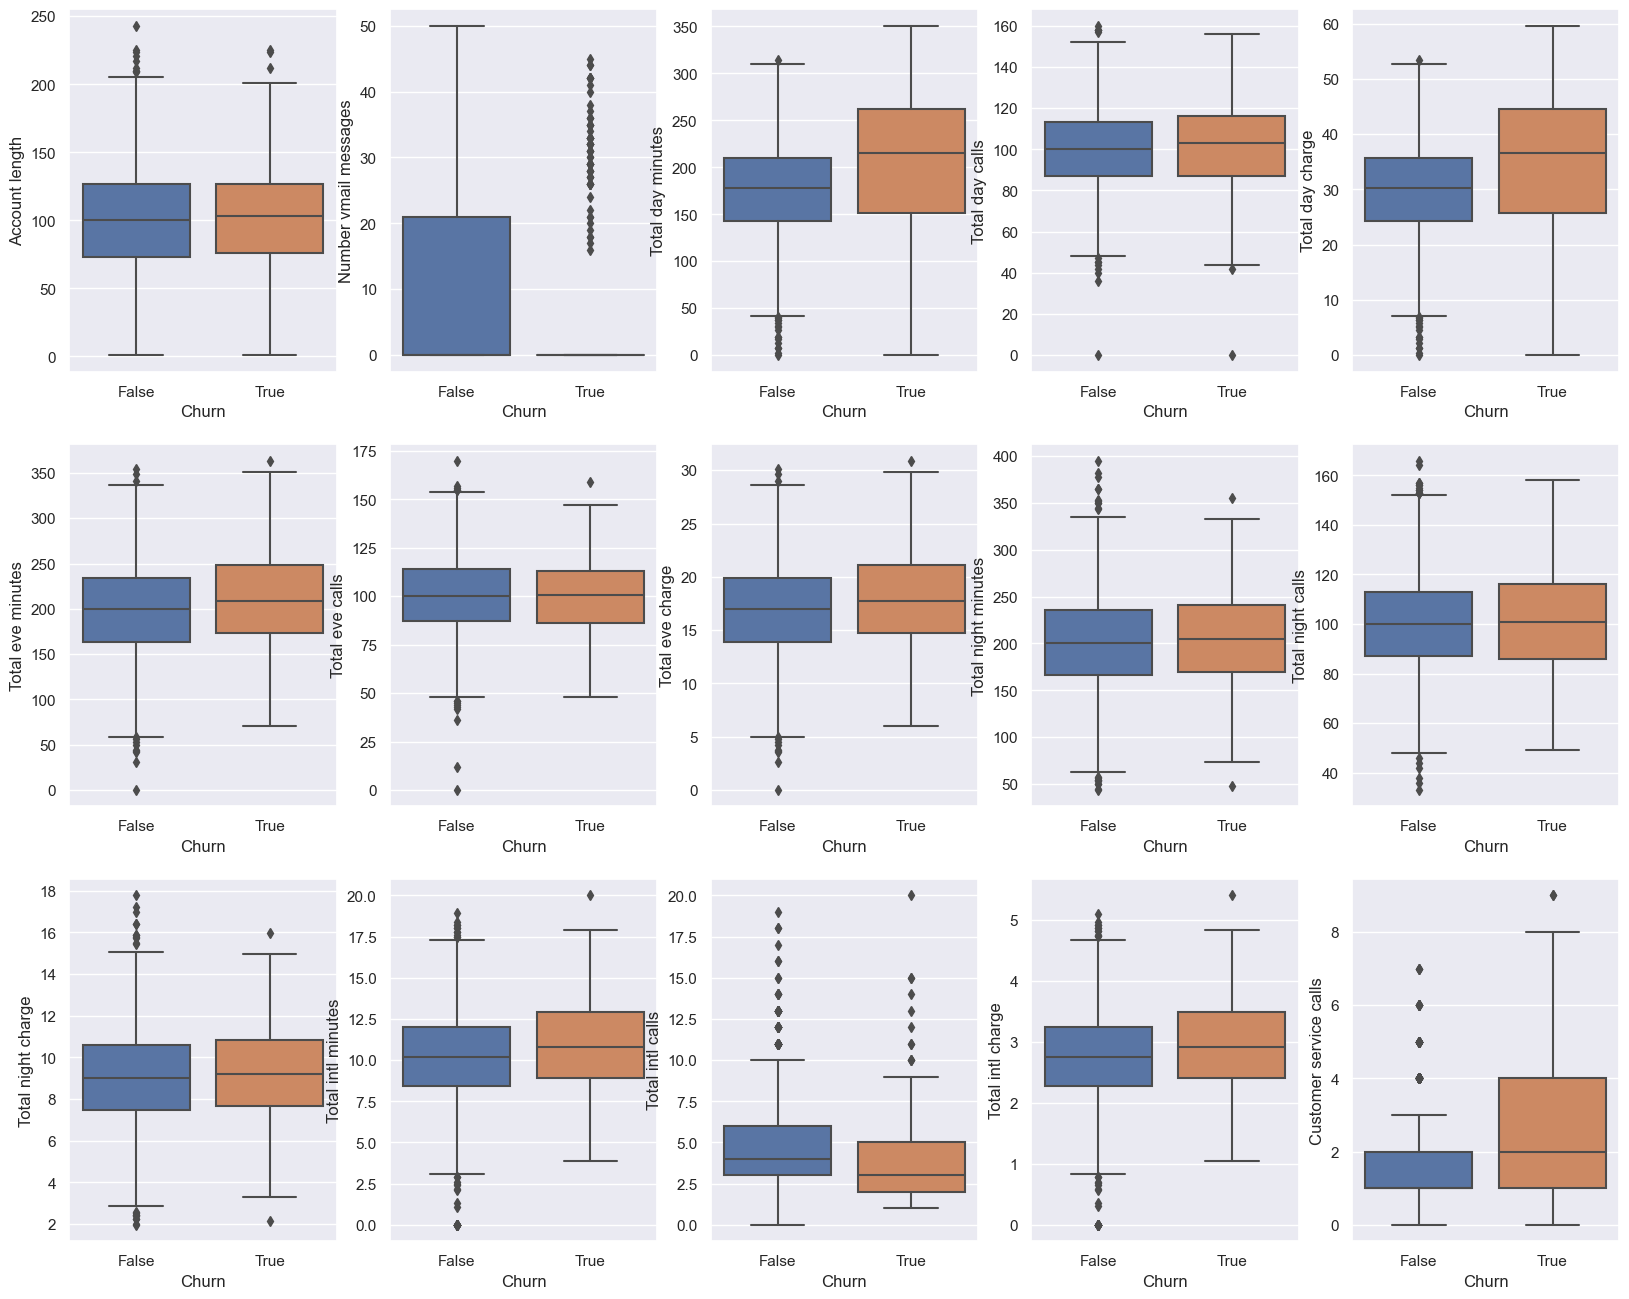

In [11]:

f, axes = plt.subplots(3,5, figsize=(20,16))
axes = axes.ravel()
count= 0
for var in data_int:
    sb.boxplot(x=data['Churn'], y=data[var], ax = axes[count])
    count +=1

<h4>
Significant variables (Numerical): </br>
-Total day minutes </br>
-Total day charge </br>
-Total eve minutes </br>
-Total eve charge </br>
-Customer service calls </br>
-Number of vmail </br>
-Total int calls & charge </br>

In [12]:
data_int.corr()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Account length,1.000000,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455
Number vmail messages,-0.002996,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787
Total day minutes,0.002847,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543
Total day calls,0.038862,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945
Total day charge,0.002843,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548
Total eve minutes,-0.015923,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192
Total eve calls,0.018552,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058
Total eve charge,-0.015909,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196
Total night minutes,-0.008994,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236
Total night calls,-0.024007,0.008124,0.015054,-0.016776,0.015057,0.009017,0.000797,0.009030,0.012736,1.000000,0.012720,-0.023447,0.019367,-0.023434,-0.005677


In [13]:
data_int.corr()['Total day calls'].abs().sort_values(ascending=False)

Total day calls           1.000000
Account length            0.038862
Total intl charge         0.031133
Total intl minutes        0.031036
Total eve charge          0.026006
Total eve minutes         0.026003
Total day charge          0.016787
Total day minutes         0.016780
Total night calls         0.016776
Customer service calls    0.011945
Number vmail messages     0.009622
Total night minutes       0.008986
Total night charge        0.008972
Total intl calls          0.006928
Total eve calls           0.006473
Name: Total day calls, dtype: float64

<Axes: >

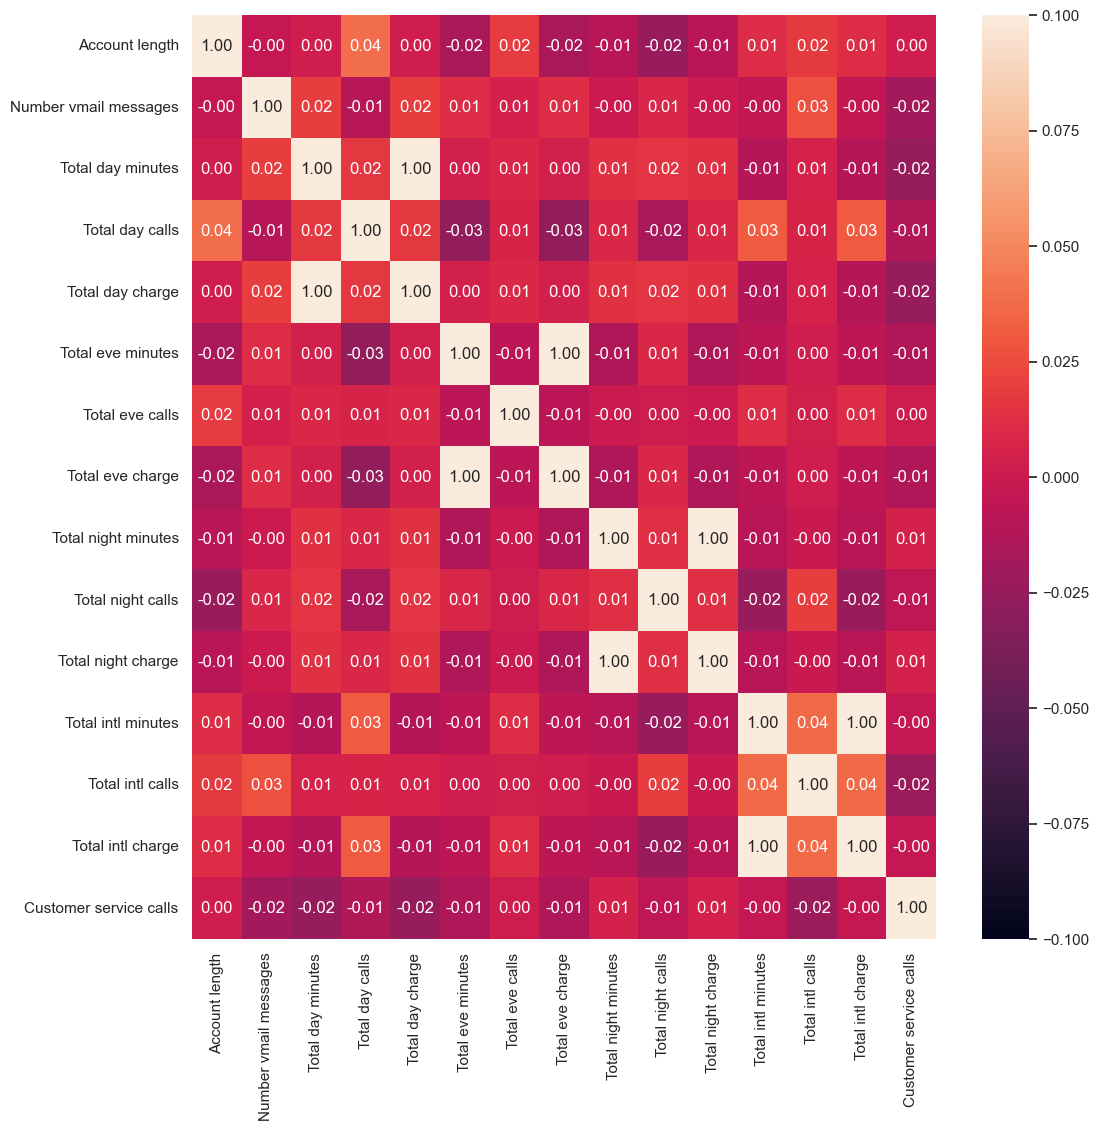

In [14]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(data_int.corr(),vmin = -0.1, vmax = 0.1, annot = True, fmt = ".2f")

In [15]:
data_cat = pd.DataFrame(data[ ['Area code','International plan', 'Voice mail plan', 'State'] ])
data_cat

,Area code,International plan,Voice mail plan,State
0,415,No,Yes,KS
1,415,No,Yes,OH
2,415,No,No,NJ
3,408,Yes,No,OH
4,415,Yes,No,OK
...,...,...,...,...
2661,415,No,No,SC
2662,415,No,Yes,AZ
2663,415,No,No,WV
2664,510,No,No,RI


In [16]:
data_cat = data_cat.astype('category')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area code           2666 non-null   category
 1   International plan  2666 non-null   category
 2   Voice mail plan     2666 non-null   category
 3   State               2666 non-null   category
dtypes: category(4)
memory usage: 13.4 KB


In [17]:
data_cat.describe()

,Area code,International plan,Voice mail plan,State
count,2666,2666,2666,2666
unique,3,2,2,51
top,415,No,No,WV
freq,1318,2396,1933,88


<Axes: xlabel='State', ylabel='count'>

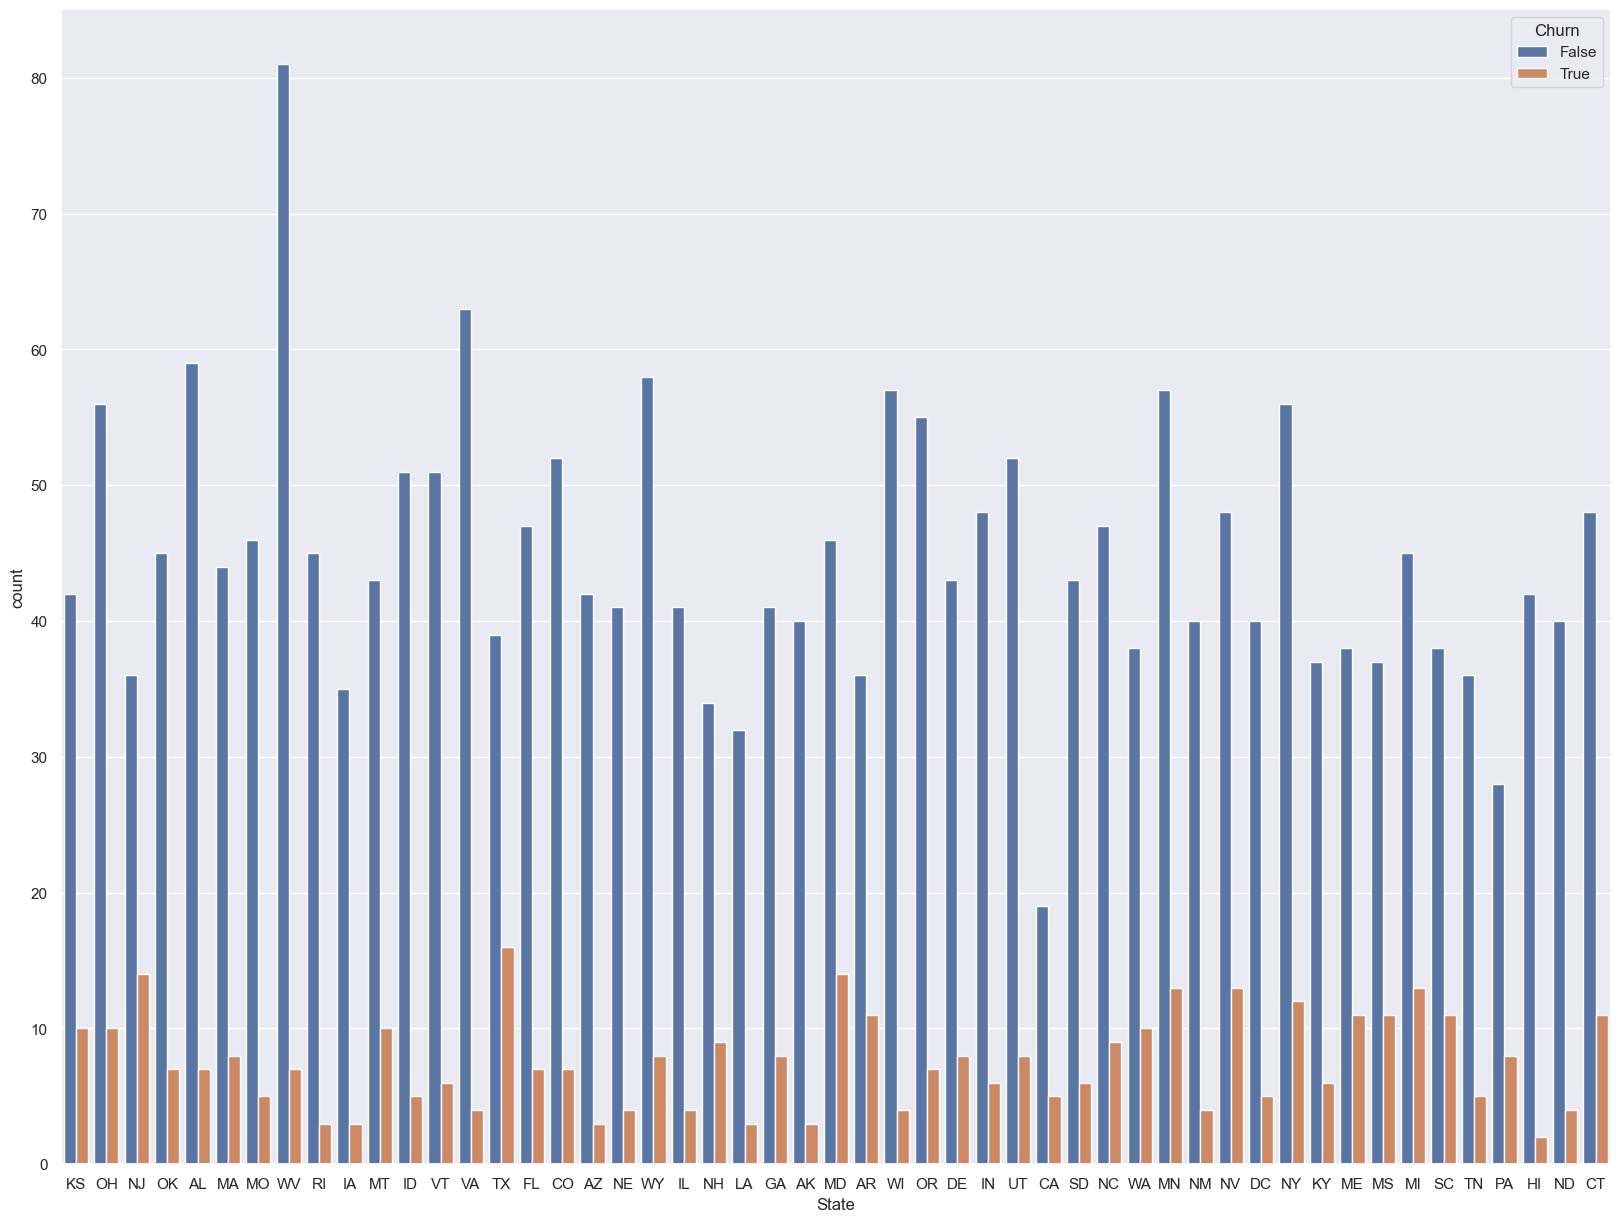

In [18]:
fig, axes = plt.subplots(figsize=(20,15))
sb.countplot( x = data['State'], hue = data['Churn'] )

#
TX , MD , NJ have the highest churn

<Axes: xlabel='International plan', ylabel='count'>

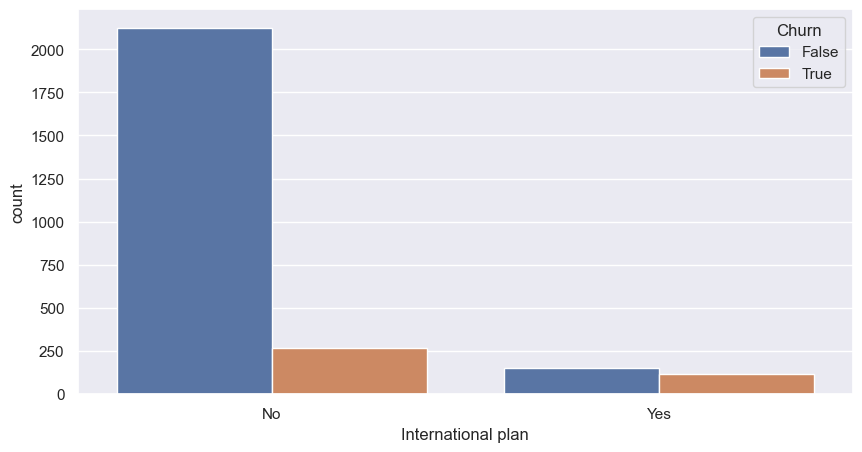

In [19]:
fig, axes = plt.subplots(figsize=(10,5))
sb.countplot( x = data['International plan'], hue = data['Churn'] )

<Axes: xlabel='Voice mail plan', ylabel='count'>

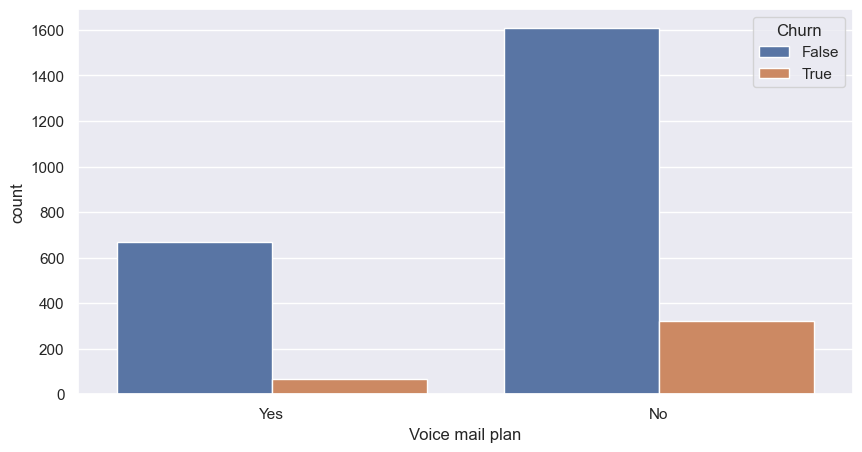

In [20]:
fig, axes = plt.subplots(figsize=(10,5))
sb.countplot( x = data['Voice mail plan'], hue = data['Churn'] )

In [21]:
data_train = pd.read_csv('churn-bigml-80.csv')
data_test = pd.read_csv('churn-bigml-20.csv')

churn = pd.DataFrame(data_train['Churn'])
day_calls = pd.DataFrame(data_train['Total day calls'])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(day_calls, churn, test_size = 0.25, random_state = 30)

[Text(0.4230769230769231, 0.875, 'Total day calls <= 48.5\ngini = 0.247\nsamples = 1999\nvalue = [1711, 288]\nclass = Churn'),
 Text(0.15384615384615385, 0.625, 'Total day calls <= 18.0\ngini = 0.497\nsamples = 13\nvalue = [6, 7]\nclass = Not Churn'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not Churn'),
 Text(0.23076923076923078, 0.375, 'Total day calls <= 41.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]\nclass = Churn'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Churn'),
 Text(0.3076923076923077, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = Not Churn'),
 Text(0.6923076923076923, 0.625, 'Total day calls <= 117.5\ngini = 0.243\nsamples = 1986\nvalue = [1705, 281]\nclass = Churn'),
 Text(0.5384615384615384, 0.375, 'Total day calls <= 109.5\ngini = 0.231\nsamples = 1598\nvalue = [1385, 213]\nclass = Churn'),
 Text(0.46153846153846156, 0.125, 'gini = 0.239\nsamples = 1327\nvalue = [1143, 184]\

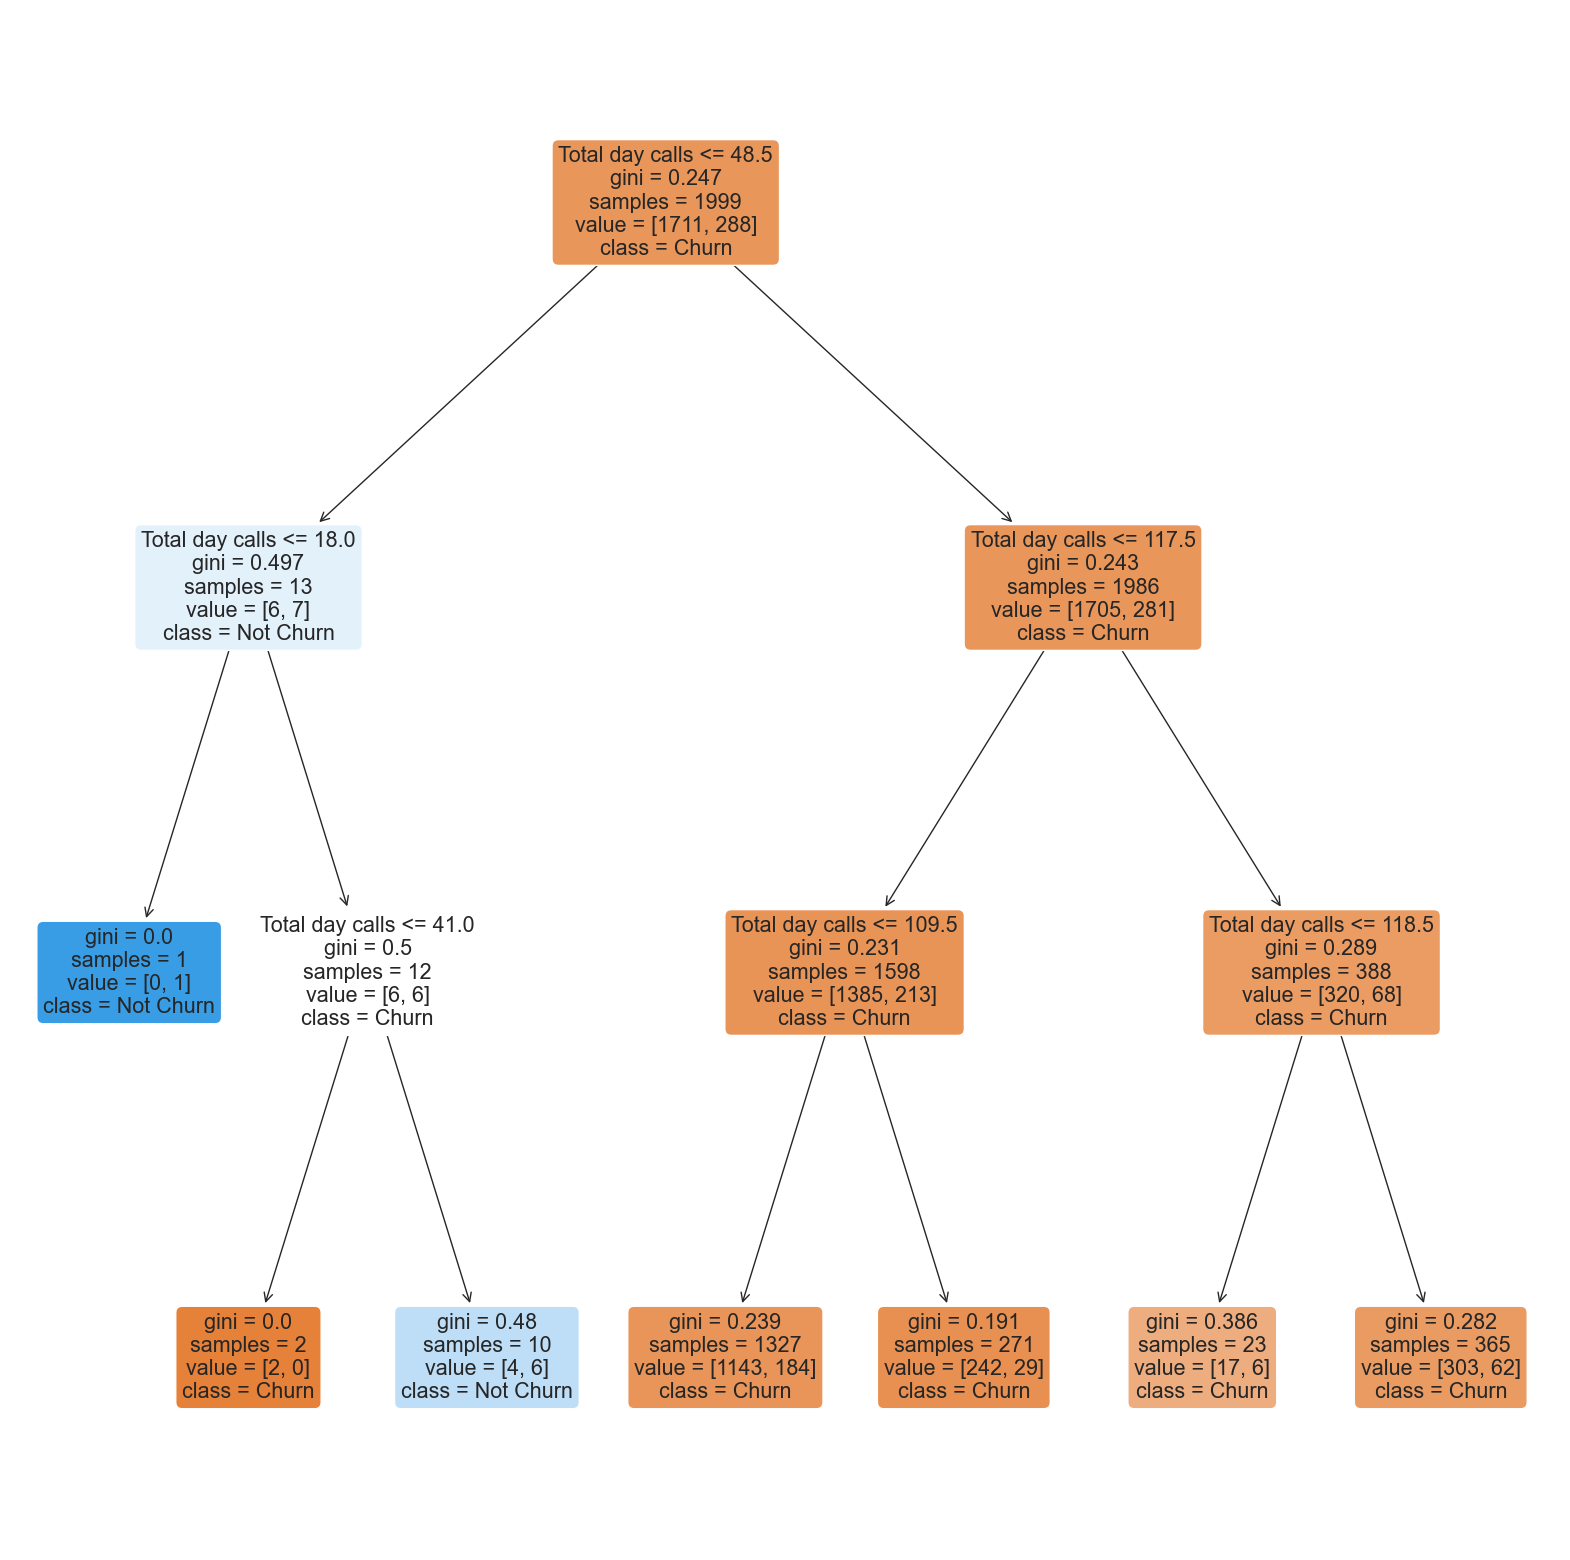

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["Total day calls"], 
          class_names=["Churn","Not Churn"])

<Axes: >

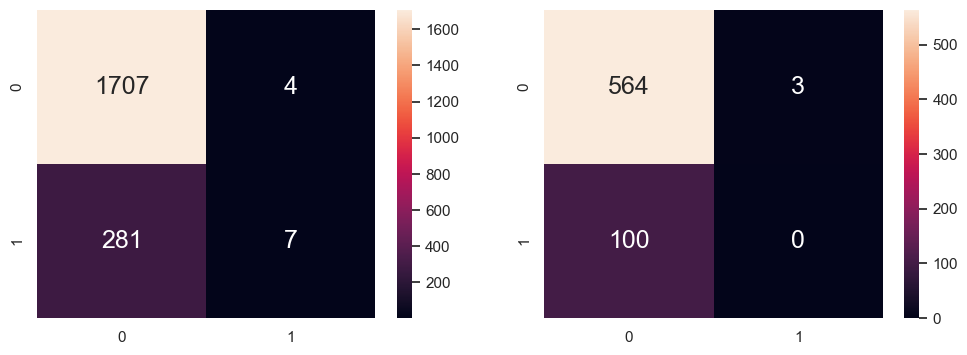

In [24]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [25]:
print("Depth = 3")
print()
print("Goodness of Fit of Model \tTrain Dataset")
print()
print("Classification Accuracy: \t", dectree.score(X_train, y_train))


# access the elements of confusion matrix

TN_train = confusion_matrix(y_train, y_train_pred)[0][0]
FP_train = confusion_matrix(y_train, y_train_pred)[0][1]
FN_train = confusion_matrix(y_train, y_train_pred)[1][0]
TP_train = confusion_matrix(y_train, y_train_pred)[1][1]

Depth = 3

Goodness of Fit of Model 	Train Dataset

Classification Accuracy: 	 0.8574287143571786


In [26]:
print("True Positive Rate(TP): \t", (TP_train/(TP_train+FN_train)))
print("False Positive Rate(FP): \t", (FP_train/(TN_train+FP_train)))


True Positive Rate(TP): 	 0.024305555555555556
False Positive Rate(FP): 	 0.0023378141437755697


In [27]:
print("Goodness of Fit of Model \tTest Dataset")
print()
print("Classification Accuracy: \t", dectree.score(X_test, y_test))


TN_test = confusion_matrix(y_test, y_test_pred)[0][0]
FP_test = confusion_matrix(y_test, y_test_pred)[0][1]
FN_test = confusion_matrix(y_test, y_test_pred)[1][0]
TP_test = confusion_matrix(y_test, y_test_pred)[1][1]


print("True Positive Rate(TP): \t", (TP_test/(TP_test+FN_test)))
print("False Positive Rate(FP): \t", (FP_test/(TN_test+FP_test)))


Goodness of Fit of Model 	Test Dataset

Classification Accuracy: 	 0.8455772113943029
True Positive Rate(TP): 	 0.0
False Positive Rate(FP): 	 0.005291005291005291


In [28]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [42]:
data["Churn"]

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int32

In [43]:
data["Churn"] = data["Churn"].astype(int)
data["Churn"].nunique()


2

In [44]:
data_int = data.select_dtypes(include=["float64","int64","int32"])
data_int

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [36]:
data_int.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
Number vmail messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539
Total eve charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893
Total night minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639


In [33]:
data_int.corr()['Churn'].abs().sort_values(ascending=False)

Churn                     1.000000
Customer service calls    0.202590
Total day charge          0.195689
Total day minutes         0.195688
Number vmail messages     0.086474
Total intl charge         0.086216
Total intl minutes        0.086204
Total eve minutes         0.072906
Total eve charge          0.072893
Total intl calls          0.069882
Total night minutes       0.033639
Total night charge        0.033635
Total day calls           0.018290
Account length            0.017728
Total night calls         0.012262
Total eve calls           0.001539
Area code                 0.001019
Name: Churn, dtype: float64